In [104]:
import csv
import matplotlib.pyplot as plt

f = open('seoul.csv')
data = csv.reader(f)

header = next(data)



In [86]:
# 날짜 데이터를 표로 출력하기

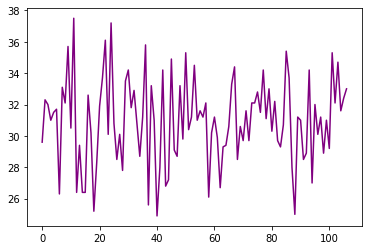

In [87]:
result = list()
## 8/1의 최고 온도를 표로 출력
for row in data:
    ### 실수: float 로 변환이 안됐음...데이터 일부 값이 ''이라서 안됐던 것. if 문으로 걸러내야함
    if row[-1] != '':
        if row[0].split('-')[1] == '08' and row[0].split('-')[2] == '01':
            result.append(float(row[-1]))

plt.plot(result, 'purple')
plt.show()

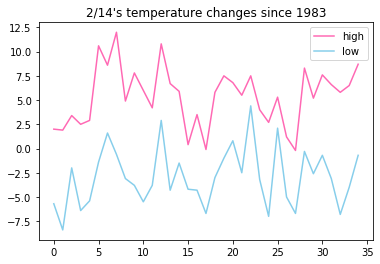

In [93]:
## 1983년 이후 02/14의 최고, 최저기온만 출력
high, low = list(), list()
for row in data:
    if row[-1] != '' and row[-2] != '':
        if 1983 < float(row[0].split('-')[0]):
            if row[0].split('-')[1] == '02' and row[0].split('-')[2] == '14':
                high.append(float(row[-1]))
                low.append(float(row[-2]))

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 기호 깨지는 것 방지
plt.title("2/14's temperature changes since 1983")
plt.plot(high, 'hotpink', label='high')
plt.plot(low, 'skyblue', label='low')
plt.legend()
plt.show()

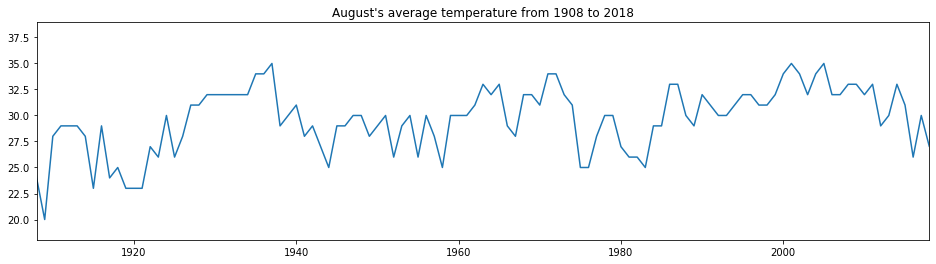

In [133]:
## 8월의 평균 최고 기온이 상승하는 그래프
import csv
import matplotlib.pyplot as plt

f = open('seoul.csv')
data = csv.reader(f)
header = next(data)
avg_temp = list()

for row in data:
    mon_temp_list = list()    
    if row[-1] != '' and row[-2] != '' and row[0].split('-')[1] == '08':
        for i in range(31):
            mon_temp_list.append(float(row[-1]))
        avg_temp.append(round(sum(mon_temp_list) / 31))


plt.figure(figsize = (16, 4))
plt.title("August's average temperature from 1908 to 2018")
plt.xlim([1908,2018])
plt.plot(avg_temp)
plt.show()

In [134]:
# 날씨 데이터를 다양하게 시각화하기

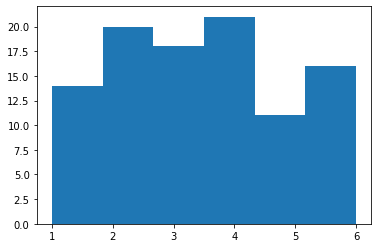

In [144]:
## 랜덤 주사위 시뮬레이션으로 히스토그램 그리기
import random
dice_result = list()
for i in range(100):
    dice_result.append(random.randint(1,6))
### hist() 로 히스토그램 생성, bins 는 X축 구간 갯수를 설정함
plt.hist(dice_result, bins=6)
plt.show()

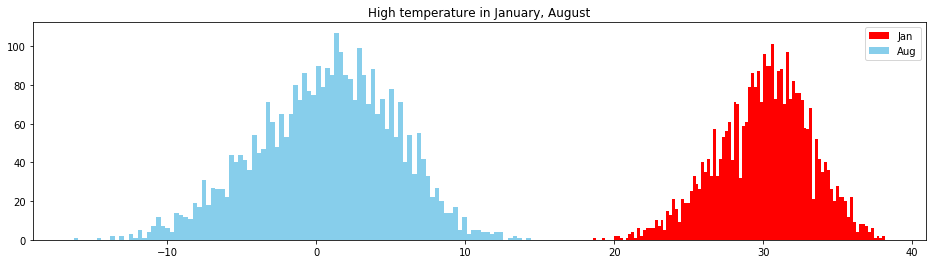

In [152]:
## 기온 데이터를 히스토그램으로 표시
f = open('seoul.csv')
data = csv.reader(f)
next(data)
january_result = list()
august_result = list()

for row in data:
    month = row[0].split('-')[1]
    if row[-1] != '':
        if month == '01':
            august_result.append(float(row[-1]))
        elif month == '08':
            january_result.append(float(row[-1]))

plt.figure(figsize = (16, 4))
plt.title('High temperature in January, August')
plt.hist(january_result, bins=100, color='red', label='Jan')
plt.hist(august_result, bins=100, color='skyblue', label='Aug')
plt.legend()
plt.show()

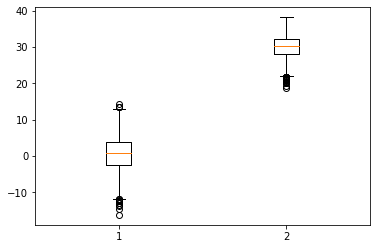

In [158]:
## 상자그림(boxplot)으로 표현하기...boxplot: 최소, 1/4, 2/4, 3/4, 최대값의 위치를 빠르게 파악할 수 있음
### 1월, 8월의 boxplot
f = open('seoul.csv')
data = csv.reader(f)
next(data)
january_result = list()
august_result = list()

for row in data:
    month = row[0].split('-')[1]
    if row[-1] != '': 
        if month == '01': january_result.append(float(row[-1]))
        elif month == '08': august_result.append(float(row[-1]))
        
plt.boxplot([january_result, august_result])
plt.show()

In [167]:
for i in range(1,13): print(i)

1
2
3
4
5
6
7
8
9
10
11
12


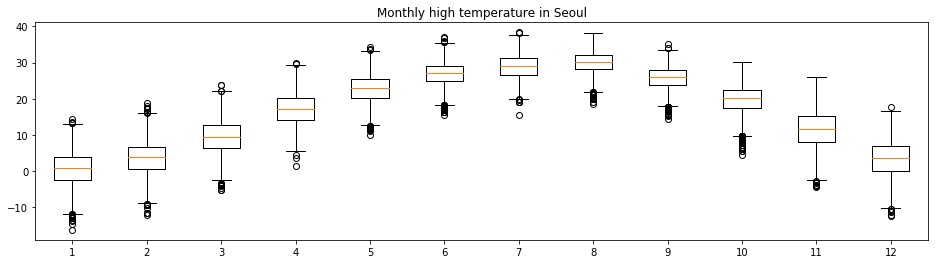

In [179]:
### 월 단위로 분류해서 boxplot 그리기
f = open('seoul.csv')
data = csv.reader(f)
header = next(data)
all_result = {
    1: list(), 2: list(), 3:list(), 4:list(), 5:list(),6:list(),7:list(),8:list(),9:list(),10:list(),11:list(),12:list()
}

for row in data:
    if row[-1] != '':
        month = float(row[0].split('-')[1])
        high_temp = float(row[-1])
        for index in range(1,13):
            if index == month: 
                all_result[index].append(high_temp)


plt.figure(figsize = (16,4))
plt.title('Monthly high temperature in Seoul')
plt.boxplot([all_result[1],all_result[2],all_result[3],all_result[4],all_result[5],all_result[6],all_result[7],all_result[8],
             all_result[9], all_result[10],all_result[11],all_result[12]])

plt.show()

##### 교재 풀이
# all_result = []
# for i in range(12): all_result.append([])
# for row in data:
#     if row[-1] != '':
#         month[int(row[0].split('-')[1]) - 1].append(float(row[-1]))
# plt.boxplot(month)

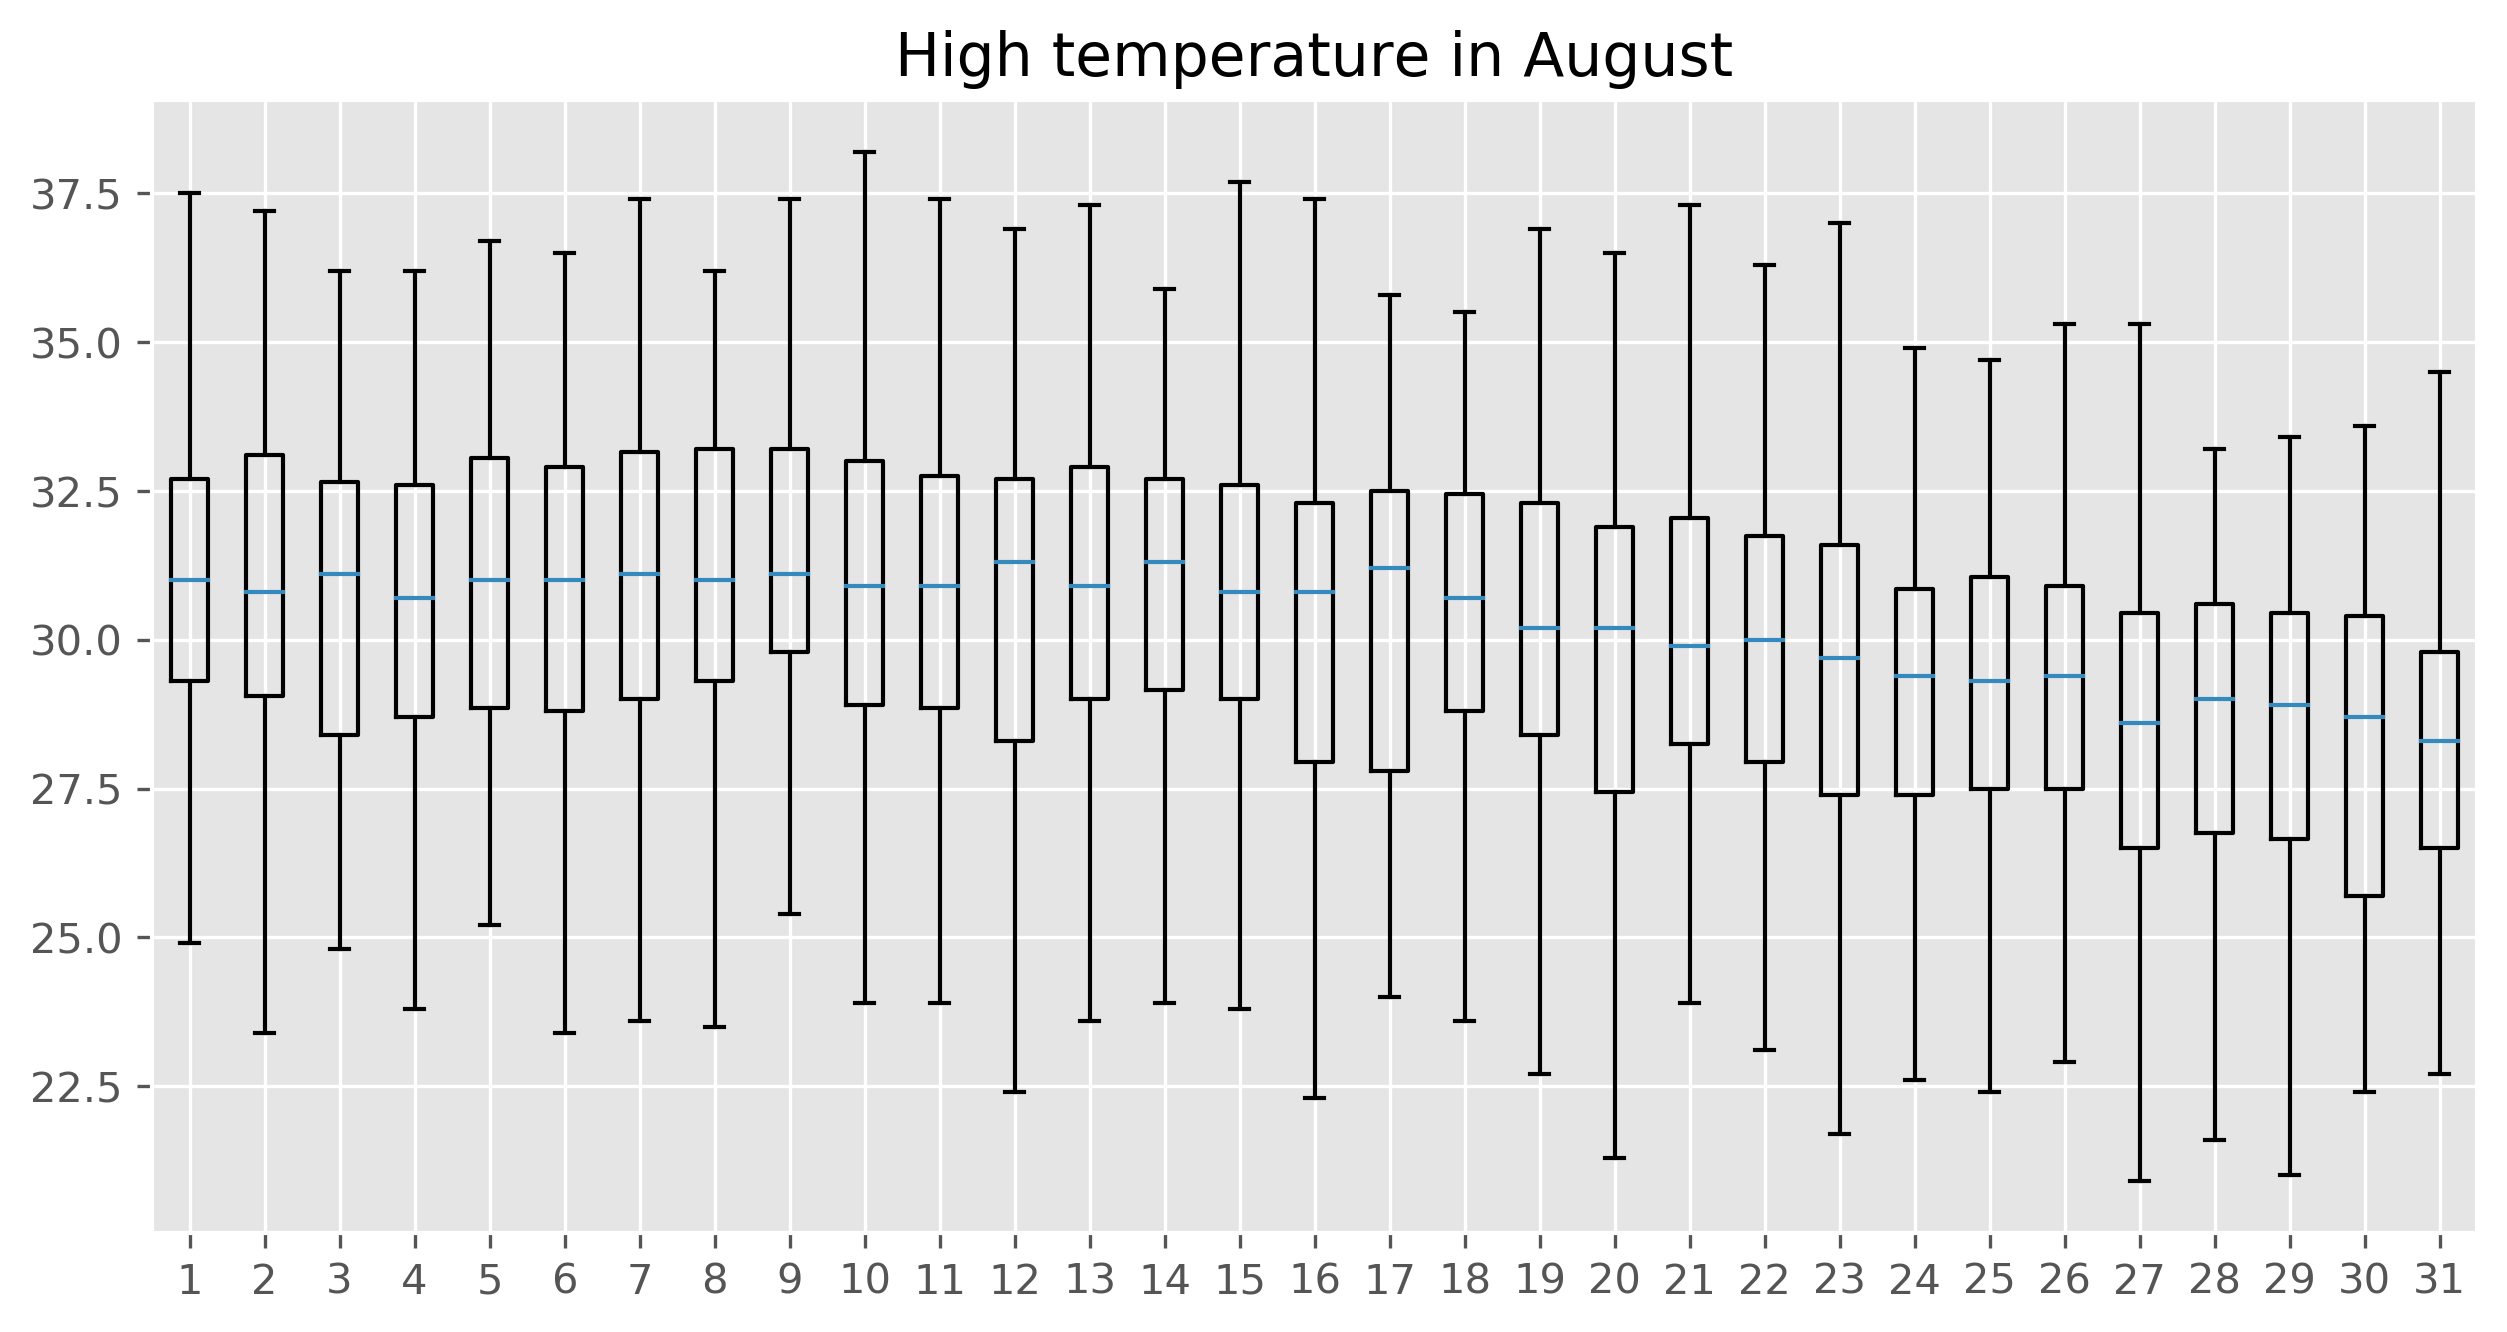

In [183]:
### 8월 일별 기온 데이터를 boxplot 으로 표시
f = open('seoul.csv')
data = csv.reader(f)
next(data)

days_list = list()
for i in range(31): days_list.append([])

for row in data:
    if row[-1] != '':
        if row[0].split('-')[1] == '08':
            days_list[int(row[0].split('-')[2]) - 1].append(float(row[-1]))
        
plt.style.use('ggplot')
plt.figure(figsize = (10, 5), dpi = 300)
plt.title('High temperature in August')
plt.boxplot(days_list, showfliers=False) # showfliers=False: 이상치(위, 아래에 있던 동그라미)를 지움
plt.show()
            